In [10]:
res_no_replay = [{'step': 1, 'countries': ('Finland',), 'train_time_s': 751.0377185344696, 'eval_time_s': 5.184728145599365, 'Finland_accuracy': 92.15789473684211, 'mean_accuracy': 92.15789473684211},  {'step': 2, 'countries': ('Finland', 'Ireland'), 'train_time_s': 747.6871140003204, 'eval_time_s': 9.641807317733765, 'Finland_accuracy': 84.3157894736842, 'Ireland_accuracy': 92.26315789473684, 'mean_accuracy': 88.28947368421052}, {'step': 3, 'countries': ('Finland', 'Ireland', 'Serbia'), 'train_time_s': 746.869616985321, 'eval_time_s': 14.911825180053711, 'Finland_accuracy': 81.63157894736842, 'Ireland_accuracy': 79.73684210526316, 'Serbia_accuracy': 89.89473684210526, 'mean_accuracy': 83.75438596491229}, {'step': 4, 'countries': ('Finland', 'Ireland', 'Serbia', 'Austria'), 'train_time_s': 746.7977023124695, 'eval_time_s': 20.476099252700806, 'Finland_accuracy': 87.89473684210526, 'Ireland_accuracy': 84.6842105263158, 'Serbia_accuracy': 87.78947368421052, 'Austria_accuracy': 84.63157894736842, 'mean_accuracy': 86.25}, {'step': 5, 'countries': ('Finland', 'Ireland', 'Serbia', 'Austria', 'Portugal'), 'train_time_s': 746.9890832901001, 'eval_time_s': 24.709123611450195, 'Finland_accuracy': 86.94736842105263, 'Ireland_accuracy': 88.84210526315789, 'Serbia_accuracy': 88.10526315789474, 'Austria_accuracy': 81.3157894736842, 'Portugal_accuracy': 84.47368421052632, 'mean_accuracy': 85.93684210526315}]

In [11]:
res_replay_on_weights = [{'step': 1, 'countries': ('Finland',), 'train_time_s': 752.377799987793, 'eval_time_s': 5.002251863479614, 'Finland_accuracy': 92.15789473684211, 'mean_accuracy': 92.15789473684211}, {'step': 2, 'countries': ('Finland', 'Ireland'), 'train_time_s': 1408.3372430801392, 'eval_time_s': 10.422378540039062, 'Finland_accuracy': 92.52631578947368, 'Ireland_accuracy': 92.0, 'mean_accuracy': 92.26315789473685}, {'step': 3, 'countries': ('Finland', 'Ireland', 'Serbia'), 'train_time_s': 2069.9849638938904, 'eval_time_s': 15.356135368347168, 'Finland_accuracy': 93.05263157894737, 'Ireland_accuracy': 88.89473684210526, 'Serbia_accuracy': 88.21052631578948, 'mean_accuracy': 90.05263157894736}, {'step': 4, 'countries': ('Finland', 'Ireland', 'Serbia', 'Austria'), 'train_time_s': 2735.344583272934, 'eval_time_s': 20.32269263267517, 'Finland_accuracy': 92.84210526315789, 'Ireland_accuracy': 92.42105263157895, 'Serbia_accuracy': 89.84210526315789, 'Austria_accuracy': 85.36842105263158, 'mean_accuracy': 90.11842105263156}, {'step': 5, 'countries': ('Finland', 'Ireland', 'Serbia', 'Austria', 'Portugal'), 'train_time_s': 3392.6996154785156, 'eval_time_s': 24.965062856674194, 'Finland_accuracy': 92.73684210526316, 'Ireland_accuracy': 93.0, 'Serbia_accuracy': 90.3157894736842, 'Austria_accuracy': 85.42105263157895, 'Portugal_accuracy': 83.05263157894737, 'mean_accuracy': 88.90526315789475}]

In [12]:

import matplotlib.pyplot as plt

def plot_accuracies_from_first(results, figsize=(10, 6)):
    """
    Plots mean accuracy across all steps, and for each country
    only from the step it first appears.

    Parameters
    ----------
    results : list of dict
        Each dict must have at least:
          - 'step'
          - 'mean_accuracy'
          - '<Country>_accuracy' entries for whichever countries have
            appeared up to that step.
    figsize : tuple, default (10, 6)
        Figure size in inches.
    """
    # 1) Extract and plot mean accuracy
    steps = [r['step'] for r in results]
    mean_acc = [r['mean_accuracy'] for r in results]
    plt.figure(figsize=figsize)
    plt.plot(steps, mean_acc, marker='o', linewidth=2,
             label='Mean Accuracy', color='black')

    # 2) Gather per‐country (step, accuracy) pairs
    country_data = {}
    for r in results:
        step = r['step']
        for key, val in r.items():
            if key.endswith('_accuracy') and key != 'mean_accuracy':
                country = key[:-9]  # strip '_accuracy'
                country_data.setdefault(country, []).append((step, val))

    # 3) Plot each country starting at its first step
    for country, pairs in country_data.items():
        xs, ys = zip(*pairs)  # unpack steps & accs
        plt.plot(xs, ys, marker='o', linestyle='--', label=country)

    # 4) Final styling
    plt.xlabel('Continual Learning Step')
    plt.ylabel('Accuracy (%)')
    plt.title('Country Accuracies & Mean Accuracy')
    plt.xticks(steps)
    plt.ylim(75, 100)
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

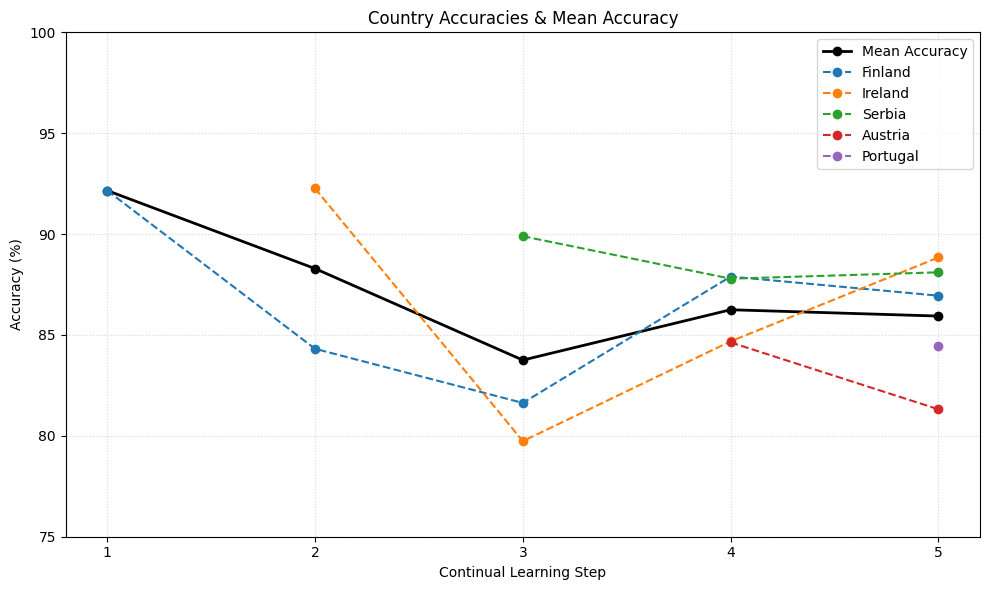

In [13]:
# assuming `results` is your list of dicts from the logs
plot_accuracies_from_first(res_no_replay)

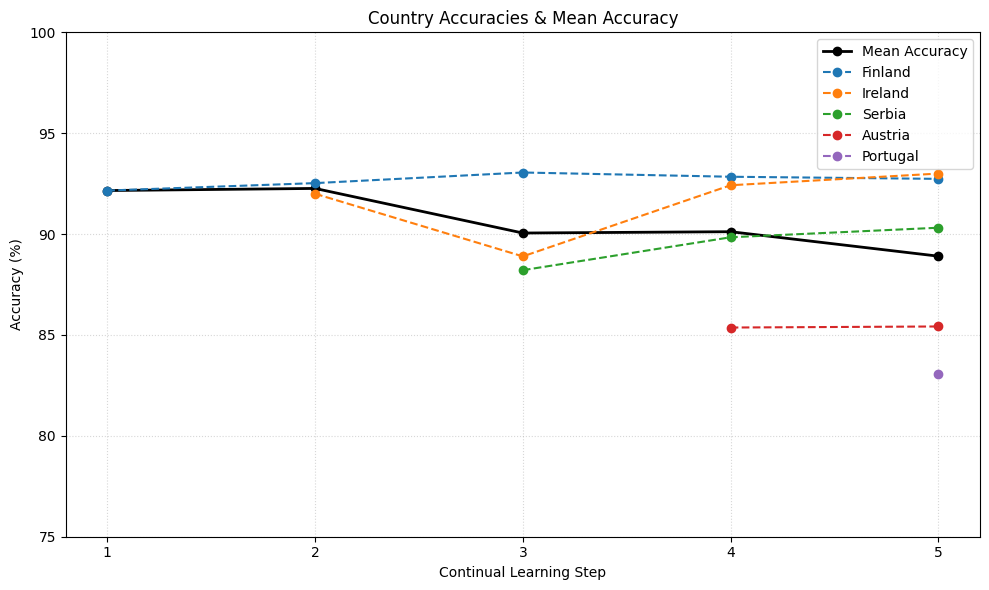

In [14]:
plot_accuracies_from_first(res_replay_on_weights)
